<a href="https://colab.research.google.com/github/yoshikawacademia/keio-engsem10/blob/main/%E8%8B%B1%E8%AA%9E%E5%AD%A6%E6%BC%94%E7%BF%92X_%E3%83%86%E3%83%BC%E3%83%9E5_%E3%83%88%E3%83%94%E3%83%83%E3%82%AFA%E8%AA%BF%E6%9F%BB%E8%B3%87%E6%96%99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# テーマ5 トピック A "共起 (co-occurrences) とコロケーション (collocations) の分析"
## 担当: 吉川

この資料では，テーマ 5 "Other methods" の**トピック A "共起 (co-occurrences) とコロケーション (collocations) の分析"** について，基本的な考え方や手法を Python コードと共に提示する．

# 共起とコロケーション
テキストデータにおいて，**一定の範囲内で複数の表現 (典型的には 2 つ) が同時に用いられること**を「共起」と呼ぶ．また，そのような表現の組み合わせ (のパターン) を「コロケーション」と呼ぶ．

一定の範囲とは，
- 段落
- 文
- 節
- 句
- 主語-動詞，修飾語-被修飾語などの依存関係 (係り受け関係)

のような文章・文法の単位が想定されることもあるが，

- 10発話以内
- 前後5語以内
- 隣接する語

など，数量的な範囲 (ウィンドウ) が設定されることも少なくない．

よく扱われるコロケーションとしては

1. 動詞 $V$ とその目的語となる名詞 $N$ の組み合わせ
2. 構文 $C$ とその述語部分を占める動詞 $V$ の組み合わせ
3. 2つの名詞 $N_1 N_2$ の連鎖

などが挙げられる．2 は **「共起構文分析 (Collostructional Analysis)」** として知られる，Stefan Gries らによる研究で中心的に扱われているコロケーションである (このような文法的関係はコロケーションではなくコリゲーション colligation と呼ぶこともある)．

## 共起構文分析
Stefanowitsch & Gries (2003) は構文研究の新しい方法として共起構文分析を提案した．その中でいくつか事例研究を提示しているが，例えば **「into 使役構文 (The *into*-causative construction)」** (e.g., (1)) の分析では，British National Corpus (BNC) における当該構文と構文に参与する動詞との共起の「強さ」が計測され，trick や fool という「だます」系の動詞と，coerce, force のような「強制する」系の動詞が強く共起することが示された．この結果は先行研究で指摘されている into 使役構文の特徴と合致しないものであり，そのことが当該手法の独自性・有効性を示すものと評価されている (Stefanowitsch & Gries 2003: 224-225)．

```
(1) a. He tricked me into employing him.  
    b. They were forced into formulating an opinion.  
    c. We conned a grown-up into buying the tickets.  
```

共起構文分析は，共起する2つの要素 (典型的には構文 $C$ と 動詞 $V$) に対して **2x2 のクロス表を作成し，フィッシャーの正確確率検定 (場合によっては $\chi^2$検定) によって依存関係を検定** する．ただし，「有意な共起関係がある」という {0, 1} の結果を示すのではなく， **検定の結果として得られる p値を「共起の強さ」を示す指標として用いる．** p値は低ければ低いほど有意である可能性が高まるので，実際は「p値の低さ」を「共起の強さ」と読み替える (Stefanowitch & Gries 2003: 218-220)．

into 使役構文の例で言えば，クロス表は {into 使役構文, $\neg$ into 使役構文} $\times$ {$V$, $\neg V$} からなる．動詞 trick との共起であれば，以下のクロス表が用いられる．ただし具体的な数値は論文内に示されてない者が多いため，数値ではない値となっているセルも多い:

|    | trick | $\neg$ trick |  計 |
|---|---|---|---|
| into 使役構文 | 92 |C - 92|into 使役構文の総頻度 (C)|
| $\neg$ into 使役構文 | V - 92 | N - C - (V - 92) | N - C|  
| 計| trick の総頻度 (V) | N - V | 動詞の総頻度 (N)  |

フィッシャーの正確確率検定の結果得られた p値は **$2.11E-267$** で (Stefanowitsch & Gries 2003: 225)，極めて低い値であるため， **当該構文と動詞 trick の結びつきは極めて強い** と結論付けられる．

なお考え方としては，trick とそれ以外の動詞の使用比率が，into 使役構文での使用とそれ以外の使用でどれくらい異なっているか (オッズ比) を見たときに， **「into 使役構文では他の環境より統計的に有意に trick が用いられる比率が高い」** ということを示そうとしている．フィッシャーの正確確率検定は「trick の比率が into 使役構文と他の構文とで異なる」ということを示す **両側検定**，および「trick の比率が into 使役構文の方が他の構文より低い」ことを示す **片側 (下側)** 検定にも対応しており，`sicpy.stats` の `fisher_exact()` 関数は **デフォルトでは両側検定** に設定されているため，共起構文分析に際しては **片側 (上側)** をオプションで指定する必要がある (`alternative="greater"`とする)．

ただし共起構文分析では両側検定を用いることもある．その場合，オッズ比が 1 を下回る組み合わせについては **構文が動詞をはねつける/遠ざける (repel)** 関係とみなされる (Stefanowitsch & Gries 2003: 214)．

## 本資料の分析対象
本資料では，上に示した **共起構文分析を実践** する．コーディングに必要な知識は既に本科目内で示されているため，本資料ではデータの選定と取得についても触れ，分析のための一連の作業を順を追って提示する．

#背景
## 分析対象
分析対象は，Stefanowitch & Gries (2003) でも扱われている， **英語の二重目的語構文 (The ditransitive construction)** とする．二重目的語構文とは，名の通り目的語を2つとり，典型的には「誰かに何かを渡す，与える」と言った意味を表す構文である．例を (2) に示す (Stefanowitsch & Gries 2003: 227):

```
(2) a. Mary gave John a book.
    b. Chris promised Pat a car.
    c. John told Mary a story.
```

この構文の2つの目的語 (それぞれ $O_1$, $O_2$ とする) はどのような名詞句でも良いわけではなく，基本的に $O_2$ には人称代名詞を用いることができず，"a book" "the truth" のような語彙的な名詞句がその位置を占める (ただし something, nothing のような不定代名詞は頻繁に登場する)．逆に $O_1$ には旧情報となる名詞句が用いられることが多く，典型的には me や her などの人称代名詞として現れる．

吉川 (2010) はこのような性質を利用し，Corpus of Contemporary American English (COCA: Davies 2008-) のデータを用いて当該構文の事例を大量に収集し，動詞部分と $O_2$ の主要部となる名詞の組み合わせについて分析を行った．そこで事例の収集に用いられたのは， **[Verb Pro Art Noun]** という配列である (Pro は代名詞，Art は冠詞を表す)．これに該当する二重目的語構文ではない事例も存在する (e.g., miss you a lot) が，数の上では少数と考えられるため，その点は考慮せずこのパターンに合致する事例を全て分析対象とした．

ここでは **この分析を一部再現** し， **当該配列全体 ($\approx$ 二重目的語構文) と動詞の共起，および動詞と $O_2$ 名詞の共起の分析** を実施する．

## データ
データは COCA の検索によって入手する．具体的には以下の手順で入手と加工を行った:

1. COCA のウェブ検索インターフェース (https://www.english-corpora.org/coca/) 上で，以下の条件で検索を行う:
   - 検索クエリ:  `VERB me ART NOUN`
   - 検索設定: `# HITS = 1000`, `GROUP BY = LEMMAS`
     - 2語目が PRO ではなく me なのは，PRO とすると該当する検索件数が膨大になり，検索システム上検索結果の取得が不可能となるためである
     - なお当該の条件でも，アカウントのグレードによっては検索が不可能かもしれない
2. 検索結果のうち，頻度が10を上回るもののみをコピーし，Excel 等を用いて整形し csv ファイルとして保存する
   - 検索結果のイメージは下図参照
   - 例えばコピーし「値のみ」で Excel 上に貼り付け，不要な空列を削除し，そのシートを csv で保存すればよい
   - 上記の処理を行い，便宜的に格列に "id", "phrase", "freq" という見出しを付けたものを K-LMS 上で配布しているので，各自使用されたい

なお， **総検索件数は 43,960件** で，最も頻度が高かった組み合わせは **give me a break (2,341件)** だった．

以下では，このデータを使用しコーディングを用いた分析を実践する．

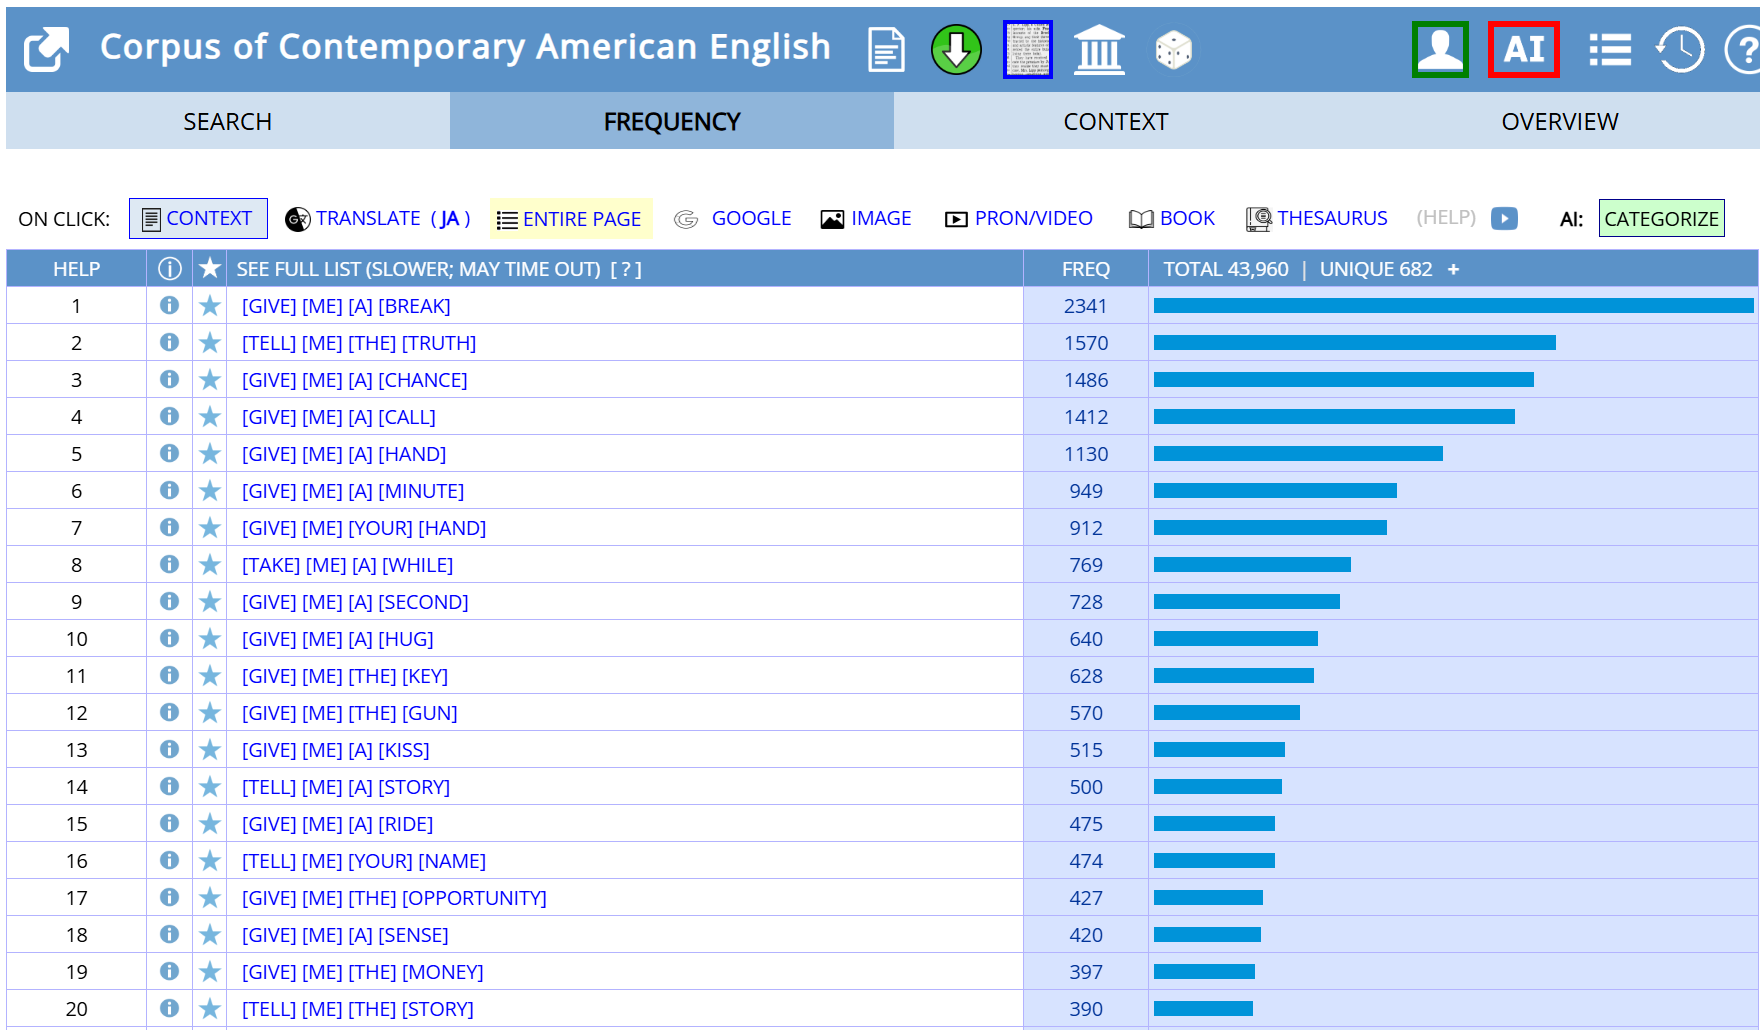
図 1. COCA 検索結果のイメージ

# コーディングと分析の実践

## 準備
まず必要なモジュールをインポートする．本分析では `pandas` および `scipy.stats`，`numpy`，可視化用に `seaborn` をインポートしておく．

また，上述のデータ (`coca_vpan_10+.csv`) をアップロードしておく．

In [ ]:
#必要なモジュールのインポート
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

## 前処理
続いて前処理として，データを pandas のデータフレームに読み込んだのち，phrase 列から動詞と $O_2$ 名詞を抜き出す処理を実行する

In [ ]:
#まずはいつもの読み込み
df = pd.read_csv("coca_vpan_10+.csv")
display(df)

,id,phrase,freq
0,1,[GIVE] [ME] [A] [BREAK],2341
1,2,[TELL] [ME] [THE] [TRUTH],1570
2,3,[GIVE] [ME] [A] [CHANCE],1486
3,4,[GIVE] [ME] [A] [CALL],1412
4,5,[GIVE] [ME] [A] [HAND],1130
...,...,...,...
552,553,[HAND] [ME] [THE] [PAPER],10
553,554,[HAND] [ME] [A] [BOOK],10
554,555,[GIVE] [ME] [YOUR] [WRIST],10
555,556,[LEAVE] [ME] [A] [VOICE],10


In [ ]:
#"verb" の抽出と "verb" 列の作成
df["verb"] = df["phrase"].str.extract(r"\[(.+?)\]")
df["verb"] = df["verb"].str.lower() #一応小文字化 (不要な気もするが)
display(df)

,id,phrase,freq,verb
0,1,[GIVE] [ME] [A] [BREAK],2341,give
1,2,[TELL] [ME] [THE] [TRUTH],1570,tell
2,3,[GIVE] [ME] [A] [CHANCE],1486,give
3,4,[GIVE] [ME] [A] [CALL],1412,give
4,5,[GIVE] [ME] [A] [HAND],1130,give
...,...,...,...,...
552,553,[HAND] [ME] [THE] [PAPER],10,hand
553,554,[HAND] [ME] [A] [BOOK],10,hand
554,555,[GIVE] [ME] [YOUR] [WRIST],10,give
555,556,[LEAVE] [ME] [A] [VOICE],10,leave


In [ ]:
# "noun" の抽出と "noun" 列の作成
df["noun"] = df["phrase"].str.extract(r" \[(\S+)\]$")
df["noun"] = df["noun"].str.lower() #一応小文字化 (不要な気もするが)
display(df)

,id,phrase,freq,verb,noun
0,1,[GIVE] [ME] [A] [BREAK],2341,give,break
1,2,[TELL] [ME] [THE] [TRUTH],1570,tell,truth
2,3,[GIVE] [ME] [A] [CHANCE],1486,give,chance
3,4,[GIVE] [ME] [A] [CALL],1412,give,call
4,5,[GIVE] [ME] [A] [HAND],1130,give,hand
...,...,...,...,...,...
552,553,[HAND] [ME] [THE] [PAPER],10,hand,paper
553,554,[HAND] [ME] [A] [BOOK],10,hand,book
554,555,[GIVE] [ME] [YOUR] [WRIST],10,give,wrist
555,556,[LEAVE] [ME] [A] [VOICE],10,leave,voice


## 動詞の頻度リストの作成
今後の処理に備え，当該パターンで用いられる動詞の頻度リストを作成する．頻度リストは `collections` の `Counter()` を用いてもよいが， **データフレームの `.groupby()` メソッド** を使うこともできるため，ここではこちらを採用する．

具体的には，`verb` 列で `groupby()` した上で `freq` 列の値を合計することで動詞の頻度を求める．

In [ ]:
#groupby で動詞の頻度集計
## verb でグルーピングし freq の合計を .sum() で計算
## sort_values() でソート (ascending=False で降順ソート)
## reset_index() でインデックスを初期化
verbs = df.groupby("verb")["freq"].sum().sort_values(ascending=False).reset_index()

#動詞のタイプ頻度 (種類数) を確認 (= 5語)
print(f"There are {len(verbs)} different verbs in this data")

#データフレームを表示
display(verbs)

#9位の "gim" は "gimme a break" などの "gimme" の誤解析と思われる

There are 50 different verbs in this data


,verb,freq
0,give,26908
1,tell,4018
2,take,1513
3,send,1267
4,show,1017
5,get,868
6,leave,745
7,call,678
8,gim,660
9,ask,565


## 追加のデータの取得
分析には，動詞の総頻度および当該パターンの総頻度の情報と，各動詞の総頻度の情報も必要になる．パターンの総頻度は上述の通り 43,960 だが， **動詞の総頻度，および各動詞の頻度は別途検索が必要** である．しかし動詞を一つ一つ検索して件数を取得していくのは手間がかかり，また記録ミスの原因にもなるため，避けたいところである．

ここで活用できるのが， **テーマ 1 で用いた COCA の頻度データ ``coca_wordFrequency_top5000.csv``** である．ここでアップロードし，データフレームに読みこんでおく．

なお COCAの動詞の総頻度は **115,045,213** である．

In [ ]:
# パターンの総頻度を pattern_freq という変数に格納しておく
pattern_freq = 43960

# 動詞の総頻度は total_freq という変数に格納しておく
total_freq = 115045213

# COCA頻度データを格納したデータフレームを作成する

coca_freq_df = pd.read_csv("coca_wordFrequency_top5000.csv")
display(coca_freq_df)

,rank,lemma,PoS,freq,perMil,%caps,%allC,range,disp,blog,...,news,acad,blogPM,webPM,TVMPM,spokPM,ficPM,magPM,newsPM,acadPM
0,1,the,a,50033612,50385.16,0.11,0.00,482995,0.98,6266654,...,6579270,7440931,50434.35,55169.32,29524.14,45672.67,53310.74,53941.86,54042.73,62116.23
1,2,be,v,32394756,32622.71,0.03,0.01,481177,0.99,5594001,...,4102481,3689062,45020.81,41409.63,62695.87,55701.50,37289.40,33259.44,33698.16,30795.96
2,3,and,c,24778098,24952.20,0.09,0.00,478670,0.98,3205178,...,2993061,3627686,25795.44,26849.01,14249.23,26275.16,25860.15,26177.63,24585.28,30283.60
3,4,a,a,24225478,24395.69,0.04,0.04,478204,0.99,3098338,...,3299770,2602697,24935.58,24747.22,20690.47,23374.72,25107.33,27541.93,27104.62,21727.08
4,5,of,i,23159162,23321.89,0.01,0.00,477933,0.97,2897295,...,2867922,4500485,23317.58,26588.36,10918.77,20157.43,19270.82,25796.39,23557.38,37569.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,5046,keyboard,n,11885,11.97,0.05,0.00,5580,0.92,2464,...,805,1380,19.83,19.25,2.45,3.74,10.75,21.43,6.61,11.52
5046,5047,persist,v,11880,11.96,0.01,0.00,9554,0.94,1181,...,1198,3860,9.50,12.60,1.33,4.29,11.00,15.92,9.84,32.22
5047,5048,wheat,n,11877,11.96,0.15,0.01,5843,0.94,1287,...,1952,1755,10.36,11.27,4.75,5.07,10.94,22.93,16.03,14.65
5048,5049,predator,n,11876,11.96,0.14,0.01,6042,0.94,1166,...,1242,1760,9.38,8.85,8.13,10.54,8.40,25.42,10.20,14.69


In [ ]:
# coca_freq_df で verbs の動詞が lemma になっているもので，かつ PoS が v のものを抽出する
verb_freq_all = coca_freq_df.query(f"lemma in {verbs['verb'].to_list()} & PoS == 'v'")[["lemma","freq"]]

## lemma 列を "verb" に, "freq" 列を "freq_all" に改名
verb_freq_all = verb_freq_all.rename(columns={"lemma":"verb", "freq": "freq_all"})
display(verb_freq_all)

,verb,freq_all
33,get,3347615
49,make,2290830
55,see,1958700
62,take,1768822
91,tell,1119692
96,find,1051936
97,give,1048189
124,call,768117
142,ask,676596
151,leave,622651


In [ ]:
# verbs との統合
## .merge() を用いて verbs と verb_freq_all を統合する

verbs = verbs.merge(verb_freq_all, on="verb", how="right")
display(verbs)

## この時点で verb_freq_all に含まれてない動詞 gim と loan は除外され 48 語となっている

,verb,freq,freq_all
0,get,868,3347615
1,make,359,2290830
2,see,20,1958700
3,take,1513,1768822
4,tell,4018,1119692
5,find,31,1051936
6,give,26908,1048189
7,call,678,768117
8,ask,565,676596
9,leave,745,622651


## 分析
ここまでの準備で分析が可能となる．以下で動詞ごとにクロス表を作成し， **`stats.fisher_exact()` を用いたフィッシャーの正確確率検定を実行** した上で，p値を取得する．

クロス表は以下のようになる:

||verb|$\neg$ verb|計|
|---|---|---|---|
|ditransitive|freq (a) | pattern_freq-freq (b) |pattern_freq|
|$\neg$ ditransitive|freq_all-freq (c)|total_freq-pattern_freq-(freq_all-freq) (d)|total_freq-pattern_freq|
|計|freq_all|total_freq-freq_all|total_freq|


考え方としては，任意の動詞 $v$ (e.g., give) とそれ以外の動詞の使用比率が，二重目的語構文での使用とそれ以外での使用でどれくらい異なっているか (オッズ比) を見たときに， **「二重目的語構文では他の環境より統計的に有意に $v$ が用いられる比率が高い」という仮説** を検定し，その仮説の「確かさ」である (負の) p値を「共起の強さ (collostructional strength)」として尺度化するということである．

In [ ]:
# p値の入れ物を作る
p_values = {}

# for ループで動詞ごとにクロス表を作成し，フィッシャーの正確確率検定を実行する
for verb in verbs["verb"]:
  print(f"------------------------------\n{verb}")

  #各セルの値を計算する
  a = verbs.query(f"verb=='{verb}'")["freq"].values[0]
  verb_freq_all = verbs.query(f"verb=='{verb}'")["freq_all"].values[0]
  b = pattern_freq - a
  c = verb_freq_all - a
  d = total_freq - pattern_freq - c

  #クロス表を作成し表示
  matrix = np.array([[a, b],
                     [c, d]]
                    )
  display(matrix)

  #検定の実行
  odds_ratio, p_value = stats.fisher_exact(matrix, alternative="greater")
  print(f"odds ratio = {odds_ratio:.3f}, p = {p_value}")

  p_values[verb] = p_value

------------------------------
get


array([[      868,     43092],
       [  3346747, 111654506]])

odds ratio = 0.672, p = 1.0
------------------------------
make


array([[      359,     43601],
       [  2290471, 112710782]])

odds ratio = 0.405, p = 1.0
------------------------------
see


array([[       20,     43940],
       [  1958680, 113042573]])

odds ratio = 0.026, p = 1.0
------------------------------
take


array([[     1513,     42447],
       [  1767309, 113233944]])

odds ratio = 2.284, p = 4.997029839442795e-172
------------------------------
tell


array([[     4018,     39942],
       [  1115674, 113885579]])

odds ratio = 10.269, p = 0.0
------------------------------
find


array([[       31,     43929],
       [  1051905, 113949348]])

odds ratio = 0.076, p = 1.0
------------------------------
give


array([[    26908,     17052],
       [  1021281, 113979972]])

odds ratio = 176.112, p = 0.0
------------------------------
call


array([[      678,     43282],
       [   767439, 114233814]])

odds ratio = 2.332, p = 1.2759184520852239e-82
------------------------------
ask


array([[      565,     43395],
       [   676031, 114325222]])

odds ratio = 2.202, p = 1.7920239419561875e-61
------------------------------
leave


array([[      745,     43215],
       [   621906, 114379347]])

odds ratio = 3.171, p = 7.393239289621751e-153
------------------------------
like


array([[       16,     43944],
       [   614675, 114386578]])

odds ratio = 0.068, p = 1.0
------------------------------
help


array([[      134,     43826],
       [   606753, 114394500]])

odds ratio = 0.576, p = 0.9999999999989725
------------------------------
show


array([[     1017,     42943],
       [   535872, 114465381]])

odds ratio = 5.059, p = 0.0
------------------------------
play


array([[       12,     43948],
       [   478728, 114522525]])

odds ratio = 0.065, p = 1.0
------------------------------
write


array([[      237,     43723],
       [   439628, 114561625]])

odds ratio = 1.413, p = 2.9672699828734513e-07
------------------------------
bring


array([[      199,     43761],
       [   439246, 114562007]])

odds ratio = 1.186, p = 0.010416700979624209
------------------------------
love


array([[       38,     43922],
       [   417494, 114583759]])

odds ratio = 0.237, p = 1.0
------------------------------
read


array([[       42,     43918],
       [   386095, 114615158]])

odds ratio = 0.284, p = 1.0
------------------------------
pay


array([[       75,     43885],
       [   365180, 114636073]])

odds ratio = 0.536, p = 0.9999999992450995
------------------------------
allow


array([[       18,     43942],
       [   288541, 114712712]])

odds ratio = 0.163, p = 1.0
------------------------------
buy


array([[      337,     43623],
       [   259864, 114741389]])

odds ratio = 3.411, p = 4.836512071701424e-78
------------------------------
send


array([[     1267,     42693],
       [   255042, 114746211]])

odds ratio = 13.352, p = 0.0
------------------------------
offer


array([[      422,     43538],
       [   233767, 114767486]])

odds ratio = 4.759, p = 8.114350137787219e-143
------------------------------
cut


array([[       31,     43929],
       [   205855, 114795398]])

odds ratio = 0.394, p = 0.9999999997025963
------------------------------
pass


array([[       11,     43949],
       [   203022, 114798231]])

odds ratio = 0.142, p = 1.0
------------------------------
cause


array([[       17,     43943],
       [   170612, 114830641]])

odds ratio = 0.260, p = 0.9999999999996867
------------------------------
teach


array([[      316,     43644],
       [   169357, 114831896]])

odds ratio = 4.909, p = 5.836432698146085e-111
------------------------------
save


array([[      151,     43809],
       [   161318, 114839935]])

odds ratio = 2.454, p = 5.962557431057435e-22
------------------------------
throw


array([[       86,     43874],
       [   152302, 114848951]])

odds ratio = 1.478, p = 0.0003868835296441364
------------------------------
shoot


array([[      145,     43815],
       [   146992, 114854261]])

odds ratio = 2.586, p = 3.7485180570416586e-23
------------------------------
drop


array([[      138,     43822],
       [   134082, 114867171]])

odds ratio = 2.698, p = 1.0400630367845557e-23
------------------------------
worry


array([[       10,     43950],
       [   119246, 114882007]])

odds ratio = 0.219, p = 0.9999999999541206
------------------------------
treat


array([[       16,     43944],
       [   101422, 114899831]])

odds ratio = 0.412, p = 0.9999881379885304
------------------------------
sing


array([[       54,     43906],
       [    91341, 114909912]])

odds ratio = 1.547, p = 0.0016351601338857882
------------------------------
cost


array([[      188,     43772],
       [    78332, 114922921]])

odds ratio = 6.301, p = 1.349543003348153e-83
------------------------------
blow


array([[       31,     43929],
       [    73330, 114927923]])

odds ratio = 1.106, p = 0.31175441990751196
------------------------------
remind


array([[      271,     43689],
       [    68911, 114932342]])

odds ratio = 10.345, p = 1.721820220689586e-170
------------------------------
cry


array([[      138,     43822],
       [    68023, 114933230]])

odds ratio = 5.321, p = 1.6126198617408306e-53
------------------------------
excuse


array([[      305,     43655],
       [    54367, 114946886]])

odds ratio = 14.772, p = 8.553117618827642e-235
------------------------------
last


array([[       51,     43909],
       [    51723, 114949530]])

odds ratio = 2.581, p = 3.3504374866176862e-09
------------------------------
grant


array([[       41,     43919],
       [    47688, 114953565]])

odds ratio = 2.250, p = 3.104034065034983e-06
------------------------------
bother


array([[       42,     43918],
       [    45554, 114955699]])

odds ratio = 2.413, p = 4.248189698528029e-07
------------------------------
hand


array([[      198,     43762],
       [    40271, 114960982]])

odds ratio = 12.916, p = 1.4578262190190067e-142
------------------------------
pour


array([[       39,     43921],
       [    36373, 114964880]])

odds ratio = 2.807, p = 2.6175458324690766e-08
------------------------------
owe


array([[      317,     43643],
       [    32626, 114968627]])

odds ratio = 25.595, p = 2.252809994e-315
------------------------------
scare


array([[       11,     43949],
       [    24473, 114976780]])

odds ratio = 1.176, p = 0.33688843054669293
------------------------------
lend


array([[       67,     43893],
       [    17709, 114983544]])

odds ratio = 9.911, p = 1.651881364084444e-42
------------------------------
spare


array([[       26,     43934],
       [    13661, 114987592]])

odds ratio = 4.981, p = 7.726271731211952e-11


In [ ]:
# 結果の整形と表示
## 結果をデータフレームに変換
collostruction_df = pd.DataFrame(p_values.items(),
                                 columns=["verb", "p_value"])

## p値順 (昇順) にソートして表示
display(collostruction_df.sort_values("p_value"))

,verb,p_value
6,give,0.000000e+00
4,tell,0.000000e+00
12,show,0.000000e+00
21,send,0.000000e+00
44,owe,2.252810e-315
38,excuse,8.553118e-235
3,take,4.997030e-172
36,remind,1.721820e-170
9,leave,7.393239e-153
22,offer,8.114350e-143


## 結果について
- 最も p 値が低かったのは **give, tell, show, send の4語** であるが，$p = 0$ となっているため，計算精度上の限界値であると思われる
- 逆に cut 以降は $p = 1.0$ となっており， **二重目的語構文には適合しない動詞** ということになる
  - おおよそ適切な結果と思われるが， **make, get** については二重目的語構文でも一定以上の使用があるため，その点は妥当とは言い難い
- また treat, scare, blow も $p \ge 0.05$ であり5%水準では有意とは言いがたい．おおよそ妥当だが，blow は **"blow someone a kiss"** という定型的な表現がある．このような **個別性の高い表現の存在は反映されない手法** と言える
- 有意と言える動詞でも，bother は二重目的語構文で用いられるとは言い難い．また call は恐らく "call A B" で「AをBと呼ぶ」の意味で用いられる別の構文の用法が反映されてしまっていると思われる

## 動詞-名詞ペアの分析
さらに，吉川 (2010) にならい **二重目的語構文の動詞部分と $O_2$名詞の組み合わせを対象とした分析** を実施する．

ややこしいのだが，このケースでは，[Verb me Art Noun] という **フレーズの中で Verb と Noun がどれくらい強く結びついているか** を検討することになる．例えば Verb = give の場合，[*give* me Art Noun] という配列と Noun に入る各名詞 (hint, money, headache, etc.) との共起を分析することになる．
従って，上の分析で用いた各動詞の COCA 全体での頻度は考慮する必要がないが，その代わり **各名詞の COCA 全体での頻度** を考慮する必要がある．また，全体の総頻度は動詞の総頻度 (`total_freq`) ではなく，コーパス全体のサイズを用いることになる．後者は別途取得が必要だが， **約10億語からなるコーパス** であることはよく知られているため，ここでは `corpus_size` という変数に10億 (= `1000000000`) という値を格納して用いることにする．

以下ではまずは上の分析同様，`.groupby()` を用いた名詞の頻度集計を行う．

In [ ]:
# COCA総語数を corpus_size に
corpus_size = 1000000000

#groupby で名詞の頻度集計
## noun でグルーピングし freq の合計を .sum() で計算
## sort_values() でソート (ascending=False で降順ソート)
## reset_index() でインデックスを初期化
nouns = df.groupby("noun")["freq"].sum().sort_values(ascending=False).reset_index()

#動詞のタイプ頻度 (種類数) を確認 (= 5語)
print(f"There are {len(nouns)} different nouns in this data")

#数が多いので頻度トップ50を表示
display(nouns.head(50))


There are 296 different nouns in this data


,noun,freq
0,break,2657
1,hand,2344
2,chance,1748
3,truth,1570
4,name,1508
5,call,1449
6,minute,1238
7,lot,1128
8,money,1048
9,story,1036


## 名詞の総頻度の取得
続いて，`coca_freq_df` から各名詞の総頻度を取得する．上の動詞のケースと同様に，nouns の名詞が lemma になっているもので，かつ PoS が n のものを抽出する

In [ ]:
# coca_freq_df で nouns の名詞が lemma になっているもので，かつ PoS が n のものを抽出する
noun_freq_all = coca_freq_df.query(f"lemma in {nouns['noun'].to_list()} & PoS == 'n'")[["lemma","freq"]]

## lemma 列を "noun" に, "freq" 列を "freq_all" に改名
noun_freq_all = noun_freq_all.rename(columns={"lemma":"noun", "freq": "freq_all"})
display(noun_freq_all)

,noun,freq_all
53,time,2018725
63,year,1729962
81,way,1260011
85,thing,1202004
94,man,1091176
...,...,...
4860,appreciation,12571
4874,soda,12515
4931,stack,12330
4990,try,12093


In [ ]:
# nouns との統合
## .merge() を用いて nouns と noun_freq_all を統合する

nouns = nouns.merge(noun_freq_all, on="noun", how="left")
## how="left" と指定することで，noun_freq_all に含まれない名詞も保持する
## ただし freq_all が NaN になってしまうので，後ほどこの対応は考える

display(nouns)


,noun,freq,freq_all
0,break,2657,81057.0
1,hand,2344,481332.0
2,chance,1748,172820.0
3,truth,1570,142017.0
4,name,1508,361916.0
...,...,...,...
291,fool,10,22667.0
292,child,10,685426.0
293,buck,10,35423.0
294,try,10,12093.0


続いて，{*verb* me Art Noun, $\neg$ *verb* me Art Noun} $\times$ {noun, $\neg$ noun} からなるクロス表を作成し，フィッシャーの正確確率検定を用いた分析を実施する．なおこの分析にあたっては，上の分析で ``total_freq`` が占めていた位置に ``corpus_size`` が入ることになる．模式図を示すと，

||verb me Art Noun|$\neg$ verb me Art Noun|計|
|---|---|---|---|
|noun|freq|noun_freq_all-freq|noun_freq_all|
|$\neg$ noun|verb_freq-freq|corpus_size-noun_freq_all-(verb_freq-freq)|corpus_size-noun_freq_all|
|計|verb_freq|corpus_size-verb_freq|corpus_size|

となる．

In [ ]:
#分析の実践
## p値の入れ物を作る
nv_p_values = {}

## 動詞頻度データフレーム verbs は整形してまっているので，別名で作り直す
verbs_org = df.groupby("verb")["freq"].sum().sort_values(ascending=False).reset_index()


# for ループで動詞ごとにクロス表を作成し，フィッシャーの正確確率検定を実行する
## 組み合わせ数が多いため，頻度が 100 以上の組み合わせに限定する
for i, row in df.iterrows():
  verb, noun, freq = row["verb"], row["noun"], row["freq"]
  if freq < 100:
    continue #頻度100未満を足切り

  print(f"------------------------------\n{verb}-{noun}")

  #各セルの値を計算する
  a = freq
  verb_freq = verbs_org.query(f"verb=='{verb}'")["freq"].values[0]
  noun_freq_all = nouns.query(f"noun=='{noun}'")["freq_all"].values[0]
  ## もし noun_freq_all が NaN だった場合は "freq" 列の値を代入する
  if np.isnan(noun_freq_all):
    noun_freq_all=nouns.query(f"noun=='{noun}'")["freq"].values[0]

  b = noun_freq_all- a
  c = verb_freq - a
  d = corpus_size - noun_freq_all - c

  #クロス表を作成し表示
  matrix = np.array([[a, b],
                     [c, d]]
                    )
  display(matrix)

  #検定の実行
  odds_ratio, p_value = stats.fisher_exact(matrix, alternative="greater")
  print(f"odds ratio = {odds_ratio:.3f}, p = {p_value}")

  nv_p_values[(verb,noun)] = p_value

------------------------------
give-break


array([[2.34100000e+03, 7.87160000e+04],
       [2.45670000e+04, 9.99894376e+08]])

odds ratio = 1210.432, p = 0.0
------------------------------
tell-truth


array([[1.57000000e+03, 1.40447000e+05],
       [2.44800000e+03, 9.99855535e+08]])

odds ratio = 4565.759, p = 0.0
------------------------------
give-chance


array([[1.48600000e+03, 1.71334000e+05],
       [2.54220000e+04, 9.99801758e+08]])

odds ratio = 341.098, p = 0.0
------------------------------
give-call


array([[1.41200000e+03, 1.48484000e+05],
       [2.54960000e+04, 9.99824608e+08]])

odds ratio = 372.912, p = 0.0
------------------------------
give-hand


array([[1.1300000e+03, 4.8020200e+05],
       [2.5778000e+04, 9.9949289e+08]])

odds ratio = 91.240, p = 0.0
------------------------------
give-minute


array([[9.490000e+02, 3.055920e+05],
       [2.595900e+04, 9.996675e+08]])

odds ratio = 119.589, p = 0.0
------------------------------
give-hand


array([[9.12000000e+02, 4.80420000e+05],
       [2.59960000e+04, 9.99492672e+08]])

odds ratio = 72.987, p = 0.0
------------------------------
take-while


array([[7.6900000e+02, 8.1427000e+04],
       [7.4400000e+02, 9.9991706e+08]])

odds ratio = 12692.552, p = 0.0
------------------------------
give-second


array([[7.28000000e+02, 1.45906000e+05],
       [2.61800000e+04, 9.99827186e+08]])

odds ratio = 190.552, p = 0.0
------------------------------
give-hug


array([[      640,        12],
       [    26268, 999973080]])

odds ratio = 2030299.132, p = 0.0
------------------------------
give-key


array([[6.28000000e+02, 6.67760000e+04],
       [2.62800000e+04, 9.99906316e+08]])

odds ratio = 357.827, p = 0.0
------------------------------
give-gun


array([[5.7000000e+02, 1.3200200e+05],
       [2.6338000e+04, 9.9984109e+08]])

odds ratio = 163.924, p = 0.0
------------------------------
give-kiss


array([[5.1500000e+02, 1.8532000e+04],
       [2.6393000e+04, 9.9995456e+08]])

odds ratio = 1052.874, p = 0.0
------------------------------
tell-story


array([[5.00000000e+02, 4.31684000e+05],
       [3.51800000e+03, 9.99564298e+08]])

odds ratio = 329.093, p = 0.0
------------------------------
give-ride


array([[4.75000000e+02, 4.40330000e+04],
       [2.64330000e+04, 9.99929059e+08]])

odds ratio = 408.073, p = 0.0
------------------------------
tell-name


array([[4.7400000e+02, 3.6144200e+05],
       [3.5440000e+03, 9.9963454e+08]])

odds ratio = 369.902, p = 0.0
------------------------------
give-opportunity


array([[4.27000000e+02, 1.50799000e+05],
       [2.64810000e+04, 9.99822293e+08]])

odds ratio = 106.910, p = 0.0
------------------------------
give-sense


array([[4.20000000e+02, 2.26119000e+05],
       [2.64880000e+04, 9.99746973e+08]])

odds ratio = 70.106, p = 0.0
------------------------------
give-money


array([[3.97000000e+02, 4.37186000e+05],
       [2.65110000e+04, 9.99535906e+08]])

odds ratio = 34.237, p = 0.0
------------------------------
tell-story


array([[3.90000000e+02, 4.31794000e+05],
       [3.62800000e+03, 9.99564188e+08]])

odds ratio = 248.846, p = 0.0
------------------------------
give-creep


array([[      379,         0],
       [    26529, 999973092]])

odds ratio = inf, p = 0.0
------------------------------
ask-question


array([[3.79000000e+02, 4.56922000e+05],
       [1.86000000e+02, 9.99542513e+08]])

odds ratio = 4457.440, p = 0.0
------------------------------
give-lot


array([[3.67000000e+02, 4.37178000e+05],
       [2.65410000e+04, 9.99535914e+08]])

odds ratio = 31.615, p = 0.0
------------------------------
give-example


array([[3.55000000e+02, 1.25087000e+05],
       [2.65530000e+04, 9.99848005e+08]])

odds ratio = 106.865, p = 0.0
------------------------------
give-phone


array([[3.46000000e+02, 1.94595000e+05],
       [2.65620000e+04, 9.99778497e+08]])

odds ratio = 66.925, p = 0.0
------------------------------
give-reason


array([[3.02000000e+02, 2.95275000e+05],
       [2.66060000e+04, 9.99677817e+08]])

odds ratio = 38.429, p = 0.0
------------------------------
give-idea


array([[3.00000000e+02, 3.57706000e+05],
       [2.66080000e+04, 9.99615386e+08]])

odds ratio = 31.508, p = 0.0
------------------------------
send-email


array([[2.86000000e+02, 5.25400000e+04],
       [9.81000000e+02, 9.99946193e+08]])

odds ratio = 5548.602, p = 0.0
------------------------------
gim-break


array([[2.85000000e+02, 8.07720000e+04],
       [3.75000000e+02, 9.99918568e+08]])

odds ratio = 9408.435, p = 0.0
------------------------------
give-couple


array([[2.77000000e+02, 1.88995000e+05],
       [2.66310000e+04, 9.99784097e+08]])

odds ratio = 55.023, p = 0.0
------------------------------
call-liar


array([[2.56000000e+02, 1.43480000e+04],
       [4.22000000e+02, 9.99984974e+08]])

odds ratio = 42279.478, p = 0.0
------------------------------
give-look


array([[2.54000000e+02, 1.59891000e+05],
       [2.66540000e+04, 9.99813201e+08]])

odds ratio = 59.589, p = 0.0
------------------------------
give-chance


array([[2.50000000e+02, 1.72570000e+05],
       [2.66580000e+04, 9.99800522e+08]])

odds ratio = 54.333, p = 0.0
------------------------------
show-way


array([[2.50000000e+02, 1.25976100e+06],
       [7.67000000e+02, 9.98739222e+08]])

odds ratio = 258.410, p = 0.0
------------------------------
give-opportunity


array([[2.43000000e+02, 1.50983000e+05],
       [2.66650000e+04, 9.99822109e+08]])

odds ratio = 60.348, p = 0.0
------------------------------
give-money


array([[2.42000000e+02, 4.37341000e+05],
       [2.66660000e+04, 9.99535751e+08]])

odds ratio = 20.741, p = 1.7664848071766593e-220
------------------------------
leave-message


array([[2.38000000e+02, 1.29561000e+05],
       [5.07000000e+02, 9.99869694e+08]])

odds ratio = 3622.748, p = 0.0
------------------------------
give-headache


array([[2.320000e+02, 1.249200e+04],
       [2.667600e+04, 9.999606e+08]])

odds ratio = 696.175, p = 0.0
------------------------------
buy-drink


array([[2.30000000e+02, 5.15360000e+04],
       [1.07000000e+02, 9.99948127e+08]])

odds ratio = 41707.180, p = 0.0
------------------------------
leave-choice


array([[2.29000000e+02, 1.59048000e+05],
       [5.16000000e+02, 9.99840207e+08]])

odds ratio = 2789.897, p = 0.0
------------------------------
offer-job


array([[2.28000000e+02, 4.30767000e+05],
       [1.94000000e+02, 9.99568811e+08]])

odds ratio = 2727.115, p = 0.0
------------------------------
give-name


array([[2.21000000e+02, 3.61695000e+05],
       [2.66870000e+04, 9.99611397e+08]])

odds ratio = 22.887, p = 1.4351226706666303e-210
------------------------------
show-hand


array([[2.10000000e+02, 4.81122000e+05],
       [8.07000000e+02, 9.99517861e+08]])

odds ratio = 540.606, p = 0.0
------------------------------
show-money


array([[2.04000000e+02, 4.37379000e+05],
       [8.13000000e+02, 9.99561604e+08]])

odds ratio = 573.444, p = 0.0
------------------------------
give-moment


array([[2.0000000e+02, 2.4616200e+05],
       [2.6708000e+04, 9.9972693e+08]])

odds ratio = 30.412, p = 1.5698684758460907e-214
------------------------------
give-strength


array([[1.93000000e+02, 6.83440000e+04],
       [2.67150000e+04, 9.99904748e+08]])

odds ratio = 105.696, p = 1.814428698472244e-309
------------------------------
remind-lot


array([[1.92000000e+02, 4.37353000e+05],
       [7.90000000e+01, 9.99562376e+08]])

odds ratio = 5554.589, p = 0.0
------------------------------
give-phone


array([[1.92000000e+02, 1.94749000e+05],
       [2.67160000e+04, 9.99778343e+08]])

odds ratio = 36.894, p = 1.1559529415770088e-221
------------------------------
give-shot


array([[1.86000000e+02, 1.00830000e+05],
       [2.67220000e+04, 9.99872262e+08]])

odds ratio = 69.024, p = 2.3636282723941942e-264
------------------------------
give-name


array([[1.79000000e+02, 3.61737000e+05],
       [2.67290000e+04, 9.99611355e+08]])

odds ratio = 18.506, p = 2.7484395301151043e-155
------------------------------
give-ball


array([[1.75000000e+02, 1.10595000e+05],
       [2.67330000e+04, 9.99862497e+08]])

odds ratio = 59.183, p = 2.3413500888867776e-237
------------------------------
write-letter


array([[1.67000000e+02, 1.32661000e+05],
       [7.00000000e+01, 9.99867102e+08]])

odds ratio = 17981.149, p = 0.0
------------------------------
give-number


array([[1.61000000e+02, 4.44251000e+05],
       [2.67470000e+04, 9.99528841e+08]])

odds ratio = 13.543, p = 1.8822176284752075e-119
------------------------------
give-lift


array([[      157,         0],
       [    26751, 999973092]])

odds ratio = inf, p = 0.0
------------------------------
tell-name


array([[1.56000000e+02, 3.61760000e+05],
       [3.86200000e+03, 9.99634222e+08]])

odds ratio = 111.618, p = 3.5770261750644395e-253
------------------------------
give-job


array([[1.55000000e+02, 4.30840000e+05],
       [2.67530000e+04, 9.99542252e+08]])

odds ratio = 13.441, p = 1.3059612255728217e-114
------------------------------
take-moment


array([[1.54000000e+02, 2.46208000e+05],
       [1.35900000e+03, 9.99752279e+08]])

odds ratio = 460.142, p = 0.0
------------------------------
tell-name


array([[1.49000000e+02, 3.61767000e+05],
       [3.86900000e+03, 9.99634215e+08]])

odds ratio = 106.414, p = 6.689132020883009e-239
------------------------------
give-sec


array([[      142,        28],
       [    26766, 999973064]])

odds ratio = 189467.682, p = 0.0
------------------------------
cry-river


array([[1.3800000e+02, 1.0013200e+05],
       [0.0000000e+00, 9.9989973e+08]])

odds ratio = inf, p = 0.0
------------------------------
give-answer


array([[1.38000000e+02, 1.30396000e+05],
       [2.67700000e+04, 9.99842696e+08]])

odds ratio = 39.527, p = 5.81000283501325e-164
------------------------------
send-message


array([[1.37000000e+02, 1.29662000e+05],
       [1.13000000e+03, 9.99869071e+08]])

odds ratio = 934.916, p = 0.0
------------------------------
give-time


array([[1.37000000e+02, 2.01858800e+06],
       [2.67710000e+04, 9.97954504e+08]])

odds ratio = 2.530, p = 3.6189069438989626e-21
------------------------------
give-heart


array([[1.36000000e+02, 2.16209000e+05],
       [2.67720000e+04, 9.99756883e+08]])

odds ratio = 23.490, p = 6.580062197869781e-132
------------------------------
help-lot


array([[1.34000000e+02, 4.37411000e+05],
       [0.00000000e+00, 9.99562455e+08]])

odds ratio = inf, p = 0.0
------------------------------
give-hint


array([[1.30000000e+02, 1.64910000e+04],
       [2.67780000e+04, 9.99956601e+08]])

odds ratio = 294.374, p = 1.6360158196948207e-266
------------------------------
give-word


array([[1.27000000e+02, 4.02089000e+05],
       [2.67810000e+04, 9.99571003e+08]])

odds ratio = 11.789, p = 1.2731166458336666e-87
------------------------------
take-minute


array([[1.25000000e+02, 3.06416000e+05],
       [1.38800000e+03, 9.99692071e+08]])

odds ratio = 293.816, p = 3.4172863176307146e-254
------------------------------
give-courage


array([[1.23000000e+02, 2.07360000e+04],
       [2.67850000e+04, 9.99952356e+08]])

odds ratio = 221.446, p = 3.5236903459425685e-237
------------------------------
give-number


array([[1.21000000e+02, 4.44291000e+05],
       [2.67870000e+04, 9.99528801e+08]])

odds ratio = 10.162, p = 1.7370484407876587e-76
------------------------------
teach-lesson


array([[1.20000000e+02, 6.61320000e+04],
       [1.96000000e+02, 9.99933552e+08]])

odds ratio = 9257.307, p = 0.0
------------------------------
give-address


array([[1.19000000e+02, 5.38990000e+04],
       [2.67890000e+04, 9.99919193e+08]])

odds ratio = 82.409, p = 6.1651047468482224e-179
------------------------------
get-job


array([[1.19000000e+02, 4.30876000e+05],
       [7.49000000e+02, 9.99568256e+08]])

odds ratio = 368.575, p = 4.065380302650487e-252
------------------------------
drop-line


array([[1.15000000e+02, 3.19377000e+05],
       [2.30000000e+01, 9.99680485e+08]])

odds ratio = 15650.477, p = 0.0
------------------------------
give-idea


array([[1.140000e+02, 3.578920e+05],
       [2.679400e+04, 9.996152e+08]])

odds ratio = 11.884, p = 3.1989644164363416e-79
------------------------------
give-list


array([[1.1300000e+02, 1.4638200e+05],
       [2.6795000e+04, 9.9982671e+08]])

odds ratio = 28.805, p = 1.4342390499408189e-119
------------------------------
excuse-minute


array([[1.12000000e+02, 3.06429000e+05],
       [1.93000000e+02, 9.99693266e+08]])

odds ratio = 1893.205, p = 1.637592995231802e-308
------------------------------
make-offer


array([[1.12000000e+02, 4.28320000e+04],
       [2.47000000e+02, 9.99956809e+08]])

odds ratio = 10586.050, p = 0.0
------------------------------
send-e-mail


array([[1.11000000e+02, 4.09810000e+04],
       [1.15600000e+03, 9.99957752e+08]])

odds ratio = 2342.957, p = 0.0
------------------------------
teach-lot


array([[1.09000000e+02, 4.37436000e+05],
       [2.07000000e+02, 9.99562248e+08]])

odds ratio = 1203.238, p = 8.243129756034117e-280
------------------------------
give-sign


array([[1.07000000e+02, 1.12496000e+05],
       [2.68010000e+04, 9.99860596e+08]])

odds ratio = 35.484, p = 1.0321882342770445e-122
------------------------------
give-number


array([[1.06000000e+02, 4.44306000e+05],
       [2.68020000e+04, 9.99528786e+08]])

odds ratio = 8.897, p = 9.043552061384662e-62
------------------------------
give-choice


array([[1.06000000e+02, 1.59171000e+05],
       [2.68020000e+04, 9.99813921e+08]])

odds ratio = 24.842, p = 9.908384962629018e-106
------------------------------
give-tour


array([[1.0500000e+02, 5.4052000e+04],
       [2.6803000e+04, 9.9991904e+08]])

odds ratio = 72.470, p = 2.409971587441223e-152
------------------------------
give-smile


array([[1.0400000e+02, 5.5832000e+04],
       [2.6804000e+04, 9.9991726e+08]])

odds ratio = 69.489, p = 4.818252004279181e-149
------------------------------
send-letter


array([[1.00000000e+02, 1.32728000e+05],
       [1.16700000e+03, 9.99866005e+08]])

odds ratio = 645.518, p = 6.469194802977087e-238
------------------------------
give-name


array([[1.00000000e+02, 3.61816000e+05],
       [2.68080000e+04, 9.99611276e+08]])

odds ratio = 10.306, p = 4.202609526203538e-64


In [ ]:
# 結果の整形と表示
## 結果をデータフレームに変換
verb_noun_df = pd.DataFrame(nv_p_values.items(),
                            columns=["verb-noun", "p_value"])

## p値順 (昇順) にソートして表示 (5%水準で有意なペアのみ)
### 数が多いので上から 50 と残りに分けて表示する
display(verb_noun_df.query("p_value < 0.05").sort_values("p_value").head(50))
display(verb_noun_df.query("p_value < 0.05").sort_values("p_value").iloc[50:])

,verb-noun,p_value
0,"(give, break)",0.000000e+00
1,"(tell, truth)",0.000000e+00
2,"(give, chance)",0.000000e+00
3,"(give, call)",0.000000e+00
4,"(give, hand)",0.000000e+00
5,"(give, minute)",0.000000e+00
6,"(take, while)",0.000000e+00
7,"(give, second)",0.000000e+00
8,"(give, hug)",0.000000e+00
9,"(give, key)",0.000000e+00


,verb-noun,p_value
42,"(give, shot)",2.363628e-264
58,"(take, minute)",3.417286e-254
62,"(get, job)",4.065380e-252
14,"(tell, name)",6.689132e-239
73,"(send, letter)",6.469195e-238
43,"(give, ball)",2.341350e-237
59,"(give, courage)",3.523690e-237
22,"(give, phone)",1.155953e-221
17,"(give, money)",1.766485e-220
39,"(give, moment)",1.569868e-214


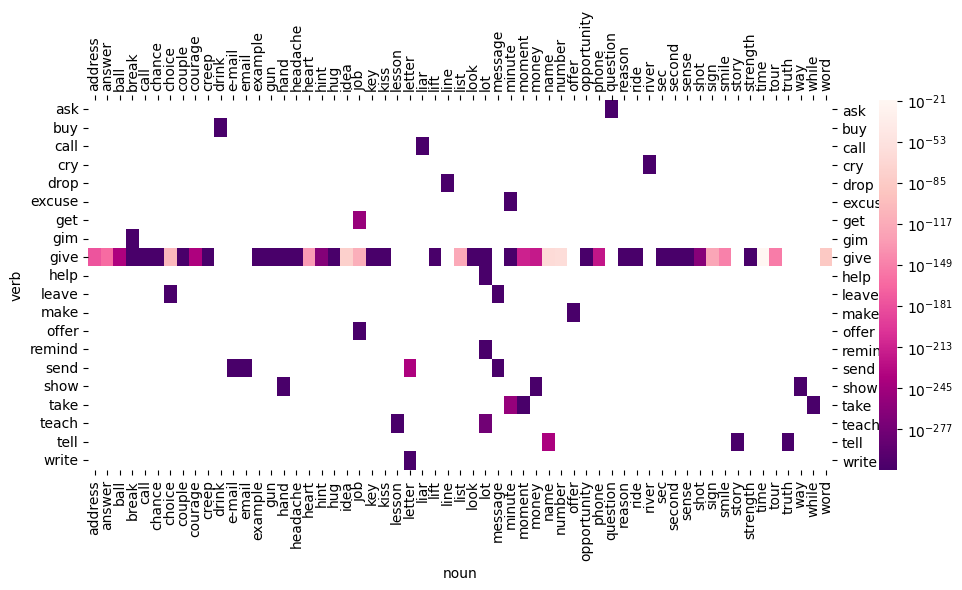

In [ ]:
# 結果の可視化
## (verb, noun) をそれぞれ列と行に変換する

## 可視化の補助のためいくつかのモジュール等をインポート
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## データフレームをコピーし heatmap_df を作る
heatmap_df = verb_noun_df.copy()
heatmap_df["p_value"] = np.where(heatmap_df["p_value"]==0,
                                 np.finfo(float).tiny, heatmap_df["p_value"]) #p = 0 を 0 ではない最小の値に変換
heatmap_df["verb"] = heatmap_df["verb-noun"].apply(lambda x: x[0]) #動詞部分を抽出
heatmap_df["noun"] = heatmap_df["verb-noun"].apply(lambda x: x[1]) #名詞部分を抽出
heatmap_df = heatmap_df.pivot(index="verb", columns="noun", values="p_value") #動詞×名詞のデータフレームに変換
#display(heatmap_df)

## ヒートマップで可視化
### LogNorm でカラーマップのスケールをログに変換
### p 値が低ければ低いほど濃くなるように cmap を設定
ax = sns.heatmap(heatmap_df,
                 norm=LogNorm(),
                 cmap="RdPu_r",# vmin=1.0e-10
                 yticklabels=True, xticklabels=True)
ax.figure.set_figwidth(12) #ヒートマップの幅調整

## 軸ラベルの調整
ax.tick_params(axis='x', bottom=True, top=True, labelbottom=True, labeltop=True)
_ = plt.setp(ax.get_xticklabels(minor=False), rotation=90)
ax.tick_params(axis='y', left=True, right=True, labelleft=True, labelright=True)
_ = plt.setp(ax.get_yticklabels(minor=False), rotation=0)

## 結果について
- $p = 0$ で50近いペアが同率1位となっているが **take-while, call-liar については二重目的語構文とは言い難い** ように思えるため，その点は妥当な結果とは言えない
  - 一方 **tell-truth, ask-question, send-email, leave-message** などの定番の言い回しや， **cry-river** など特異な表現が上位に来ており，おおよその傾向としては妥当と言える
- 動詞のみの分析では構文との有意な結びつきが認定できなかった **make, get を含むペアがそれぞれ 1 つずつ (make-offer, get-job) 確認できる** ．これらの動詞は二重目的語構文で用いられる $O_2$ が限定的であるという解釈もできるが，実際は分析に用いたデータの偏りの反映であろうと思われる
- 容易に想定できる通り， **動詞 give を含むペアが圧倒的多数** を占めており，当該構文における存在感の強さを示している
  - 特に break, job, strength, headache, hint, courage など， **抽象的な名詞が多い** ことが特徴的である (この点は 吉川 2010 の結果と同様である)

# 参考文献
1. Davies, M. 2008-. *The Corpus of Contemporary American English (COCA)*. Available online at https://www.english-corpora.org/coca/.
1. Stefanowitsch, A., & Gries, S. T. 2003. Collostructions: Investigating the interaction of words and constructions. *International journal of corpus linguistics, 8*(2), 209-243. https://www.stgries.info/research/2003_AS-STG_Collostructions_IJCL.pdf
1. 吉川正人. 2010. 「構文の多義」再考: 事例基盤構文理論に向けて. 日本認知言語学会論文集, 10, 449-459. https://cir.nii.ac.jp/crid/1520290884373772544?lang=ja

